In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Datos
Se trabajara con la informacion de la encuesta de preguntas de opcion multiple, especificamente con las preguntas 1,2,3,4,5,6 y 23 que corresponden a genero, edad, pais, pregrado, rol actual y cuanto tiempo dedica a programa, respectivamente.

In [2]:
data = pd.read_csv('multipleChoiceResponses.csv',low_memory=False)
data = data[['Q23','Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6']]
data = data.dropna()
data = data.drop(data.index[0])
data.head()

,Q23,Q1,Q2,Q3,Q4,Q5,Q6
1,0% of my time,Female,45-49,United States of America,Doctoral degree,Other,Consultant
2,1% to 25% of my time,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other
3,75% to 99% of my time,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist
4,50% to 74% of my time,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed
5,75% to 99% of my time,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst


Ahora se usa One Hot encoder para los datos cualitativos que no tienen un orden (Q1,Q3,Q4,Q5 y Q6) y un label encoder ordenado para los datos que sitienen orden, en este caso la pregunta 23 y la pregunta 2.

In [3]:
data = pd.concat([data,pd.get_dummies(data['Q1']),pd.get_dummies(data['Q3']),pd.get_dummies(data['Q4']),pd.get_dummies(data['Q5']),pd.get_dummies(data['Q6'])],axis=1)
data = data.drop(['Q1', 'Q3', 'Q4', 'Q5','Q6'], axis=1)

In [4]:
le = LabelEncoder().fit(['0% of my time', '1% to 25% of my time', '25% to 49% of my time','50% to 74% of my time', '75% to 99% of my time', '100% of my time'])
data['Q23'] = le.transform(data['Q23'])
le1 = LabelEncoder().fit(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-69', '70-79', '80+'])
data['Q2'] = le1.transform(data['Q2'])
data.head()

,Q23,Q2,Female,Male,Prefer not to say,Prefer to self-describe,Argentina,Australia,Austria,Bangladesh,...,Not employed,Other,Principal Investigator,Product/Project Manager,Research Assistant,Research Scientist,Salesperson,Software Engineer,Statistician,Student
1,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Regresion Logistica
Se usara una regresion logistica para tratar de predecir el genero de una persona basado en el tiempo que programa, su pais, su edad, titulo y pregrado. Para esto se toma como target Q2.

In [5]:
data1 = data.drop(['Male','Female','Prefer not to say','Prefer to self-describe'],axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data1, data.loc[:, data.columns == 'Male'], test_size=0.5)
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

0.8244548117608766

In [7]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(reg.predict(X_test),y_test, labels=None, sample_weight=None).ravel()
p = tp/(tp+fp)
r = tp/(tp+fn)
print(p,r)

0.998422090729783 0.8254158060658767


Es posible con esta informacion obtener un Score superior a 0.8, teniendo en cuenta que este medidor oscila entre 0 y 1, se consider un buen estimador. Ademas se presenta una precision y un reacall muy altos lo que indica que efectivamente se esta prediciendo bien. 

# PCA
Se hace PCA a los datos completos de tal forma que se puedan obtener la cantidad de clusters que se usaran en Kmeans, se prefiere esta tecnica a usar algun tipo de score y probar con diferentes tamaños de clusters ya que tomaria demasiado tiempo explorar un numero significativo de posibles tamaños. 

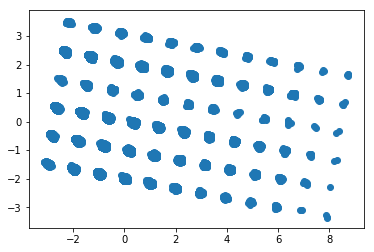

In [8]:
pca = PCA()
a = pca.fit_transform(data)
plt.scatter(a[:,0],a[:,1])

El numero optimo de clusters en este caso sera de 72.

# Kmeans
Se usa Kmeans y se obtienen los clusters, posteriormente se hace un plot que muestre en que varian estos cluster para poder determinar que significa. Para esto se usa una representacion grafica de la matriz que contiene la cantidad de personas en un grupo que cumplen con cierta caracteristica.

In [9]:
K = KMeans(n_clusters=72)
data['indice'] = pd.Series(K.fit_predict(data), index=data.index)

In [10]:
data.head()

,Q23,Q2,Female,Male,Prefer not to say,Prefer to self-describe,Argentina,Australia,Austria,Bangladesh,...,Other,Principal Investigator,Product/Project Manager,Research Assistant,Research Scientist,Salesperson,Software Engineer,Statistician,Student,indice
1,0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,1,3,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,40
3,5,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4,4,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44


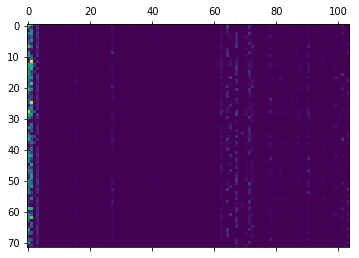

In [11]:
data2 = data.groupby('indice').sum()
plt.matshow(data2)
plt.show()

In [12]:
data2.keys()[64:72]

Index(['Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer',
       'Master’s degree', 'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'A business discipline (accounting, economics, finance, etc.)',
       'Computer science (software engineering, etc.)'],
      dtype='object')

Se puede concluir que estos clusters estan dividiendo a los encuestados segun su nivel educativo y rol actual. Esta conclusion se basa en que el eje y de la grafica anteriror indica los clusters y el eje x las caracteristicas, se puede ver que se hombre o mujer (las primeras dos caracteristicas) son fuertes pero no muy fluctuantes. Mientras que en las caracteristicas finales, en especial entre la 64 y 72 se presenta un gran fluctuacion.